**DSC 530
<br>Week 12: Term Project
<br>Topic of the Project: Analysis on NFL Players
<br>Author: Amit Saxena**

****
**Introduction:**
<br>My son got into football when he started high school, and I started following 
football too. I’m an Indian and have no idea about this sport, but since my son 
started playing, I got interested in this sport and am trying to learn as much 
as possible about it. Since my son and his friends regularly talk about NFL, I 
thought this would be a great topic and a good opportunity for me to do some 
research on player profiles. 
****

****
**Outline of statistical question/hypothesis:**

I want to research the data of NFL players and find out the traits which are common to NFL players. 
<br>Some of the questions I'd like to answer based on EDA are:
1.  What is the spread of age of NFL players?
2.	How tall are most of the players are?
3.	What is the average height of players?4.  How much does the majority of players weigh?
5.  What is the average weight of NFL players?
6.  How does the weight of offensive and defensive linemen compare to each other?
7.  Which players are taller between wide receivers and line backers?
8.  Are there more chances of getting into NFL if you’re born in certain months     of the year?
9.  Which college produces most NFL players?

****

**A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1)**


The 5 variables in the dataset I have chosen are:<br>
1. Height of the players
2. Weight of the players
3. Arms length of the players
4. Hand length of the players 
5. Age of the players
****

In [1]:
# Import the required packages to be used in the assignment-

import numpy as np
import pandas as pd
import random
import thinkstats2
import thinkplot
import csv
import matplotlib.pyplot as plt
import openpyxl

/var/folders/p_/ck1b8hsn0w52nhhh6pj15gvm0000gn/T/ipykernel_81882/1512444636.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'openpyxl'

In [39]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [40]:
import thinkstats2
import thinkplot

****
**Data:**
<br>I collected the data from Kaggle, which some of the classmates suggested, and additional data downloaded from NFL website. The dataset I have chosen is **"Active Players Profile"**, and appended it with some additional information on those players.The links to the source of data are- https://www.kaggle.com/datasets/trevyoungquist/2020-nfl-stats-active-and-retired-players

https://www.nfl.com/players/
****

In [41]:
# Import the csv with the data-

DS = pd.read_csv("/Users/asaxe/Documents/GitHub/DSC530-T303 Data Exploration and Analysis (2241-1)/DSC530- Final Project/DSC530_NFL Player Data_V2.csv")


# Displaying top 10 rows of data-

print("Number of rows in DS:", len(DS))
print("First 4 rows of DS:")
print(DS.head(4))

Number of rows in DS: 1956
First 4 rows of DS:
               Player          Full_Name  Height  Weight  Arms  Hands  \
0  Abanikanda, Israel  Israel Abanikanda      71     215  32.0   8.25   
1     Abdullah, Ameer     Ameer Abdullah      69     203  30.0   8.75   
2     Abdullah, Yasir     Yasir Abdullah      73     234  32.5   9.25   
3    Abernathy, Micah    Micah Abernathy      72     196   NaN    NaN   

       DOB  Month of Birth  Day of Birth  Year of Birth Position Team Number  \
0  10/5/02              10             5           2002       RB  NYJ     25   
1  6/13/93               6            13           1993       RB   LV     22   
2  4/12/00               4            12           2000       LB  JAC     56   
3  2/10/97               2            10           1997        S  ATL     29   

          Player Link   College  
0  Israel-Abanikanda/       NaN  
1     Ameer-Abdullah/  Nebraska  
2     Yasir-Abdullah/       NaN  
3    Micah-Abernathy/       NaN  


In [42]:
# Filtered data set of active players

DS_A = DS.dropna(subset=['Arms'])  
len(DS_A)

1234

In [43]:
# Creating a column for age
DS_A['Age'] = (2023 - DS_A['Year of Birth'])

# Deleting redundant columns-
del DS_A['Player']
del DS_A['Player Link']
del DS_A['Number']

/var/folders/p_/ck1b8hsn0w52nhhh6pj15gvm0000gn/T/ipykernel_32888/483575663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DS_A['Age'] = (2023 - DS_A['Year of Birth'])


In [44]:
# Final dataset for further grouping and sorting:

print(DS_A.head(4))  # Active player dataset


           Full_Name  Height  Weight   Arms  Hands       DOB  Month of Birth  \
0  Israel Abanikanda      71     215  32.00   8.25   10/5/02              10   
1     Ameer Abdullah      69     203  30.00   8.75   6/13/93               6   
2     Yasir Abdullah      73     234  32.50   9.25   4/12/00               4   
5      Davante Adams      73     215  32.75   9.00  12/24/92              12   

   Day of Birth  Year of Birth Position Team       College  Age  
0             5           2002       RB  NYJ           NaN   21  
1            13           1993       RB   LV      Nebraska   30  
2            12           2000       LB  JAC           NaN   23  
5            24           1992       WR   LV  Fresno State   31  


**Describe what the 5 variables mean in the dataset (Chapter 1)**<br> 

****
The variables I have chosen represent-<br>
1. Height - This variable is the height of the NFL players in inches.
2. Weight - This variable is the weight of the NFL players in pounds.
3. Arms   - This variable is the length of arms of the NFL players in inches.
4. Hands  - This variable is the length of hands of the NFL players in inches.
5. Age    - This variable is the age of the NFL players in years by the year of birth.
****

**Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2)**<br> 

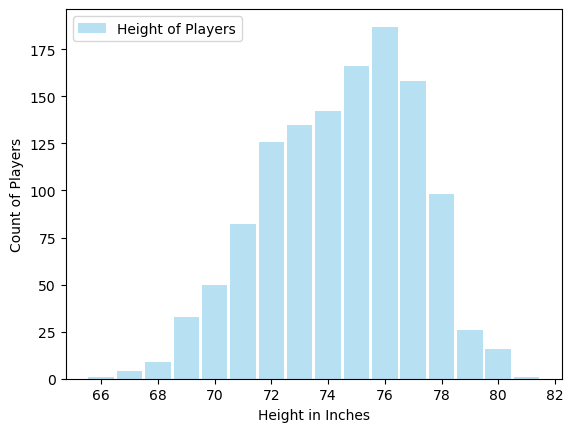

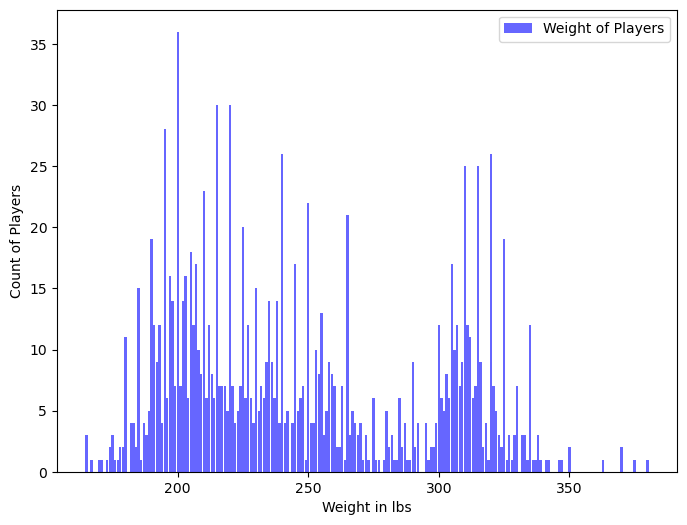

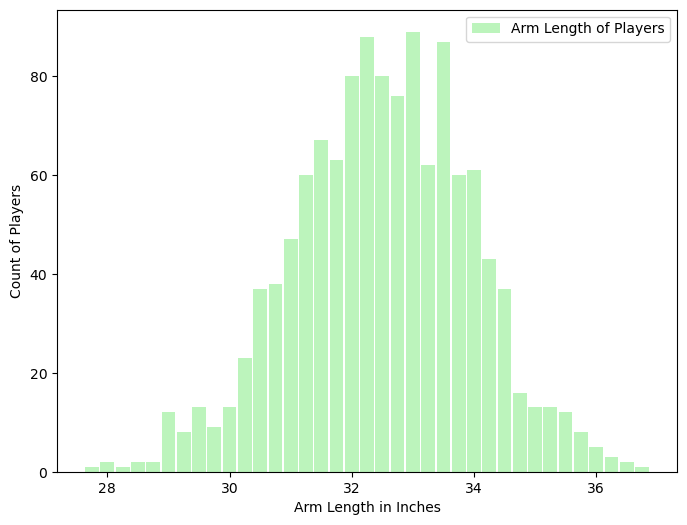

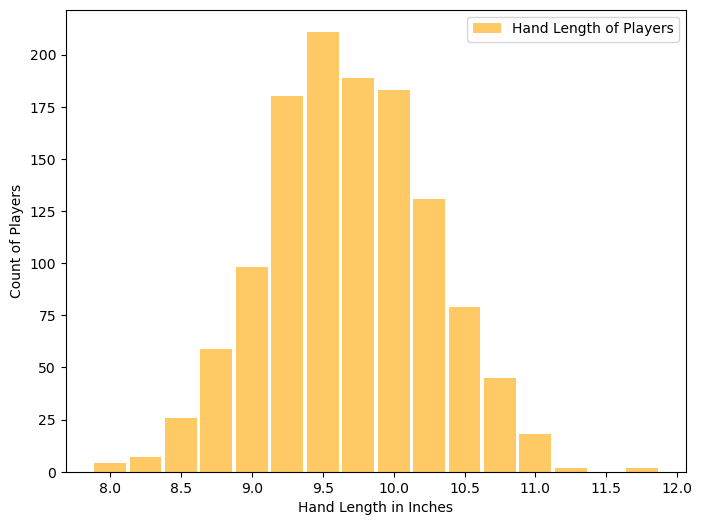

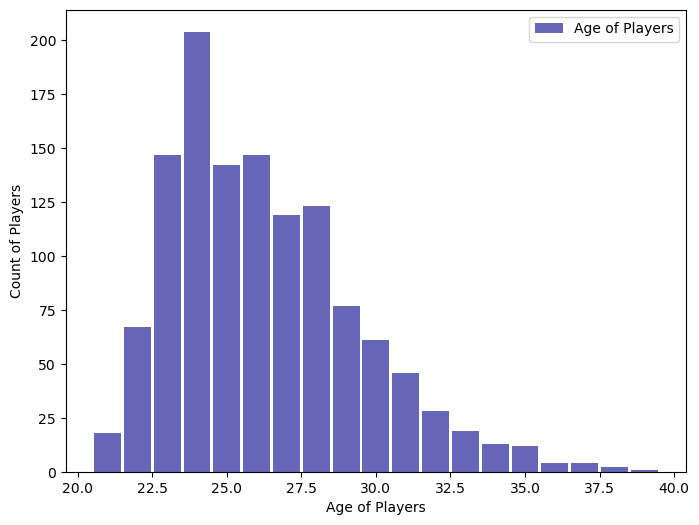

<Figure size 800x600 with 0 Axes>

In [45]:
# Visualizing and comparing Active player data by creating histograms

# Histogram of Height- 

hist_height = thinkstats2.Hist(DS_A.Height, label = 'Height of Players')
thinkplot.Hist(hist_height, color='skyblue', edgecolor='black')
thinkplot.Show(xlabel='Height in Inches', ylabel='Count of Players')

# Histogram of Weight- 

hist_weight = thinkstats2.Hist(DS_A.Weight, label = 'Weight of Players')
thinkplot.Hist(hist_weight, color='blue', edgecolor='black')
thinkplot.Show(xlabel='Weight in lbs', ylabel='Count of Players')

# Histogram of Arm length- 

hist_arms = thinkstats2.Hist(DS_A.Arms, label = 'Arm Length of Players')
thinkplot.Hist(hist_arms, color='lightgreen', edgecolor='black')
thinkplot.Show(xlabel='Arm Length in Inches', ylabel='Count of Players')

# Histogram of Hand length- 

hist_hand = thinkstats2.Hist(DS_A.Hands, label = 'Hand Length of Players')
thinkplot.Hist(hist_hand, color='orange', edgecolor='black')
thinkplot.Show(xlabel='Hand Length in Inches', ylabel='Count of Players')

# Histogram of Age- 

hist_age = thinkstats2.Hist(DS_A.Age, label = 'Age of Players')
thinkplot.Hist(hist_age, color='darkblue', edgecolor='black')
thinkplot.Show(xlabel='Age of Players', ylabel='Count of Players')

plt.tight_layout()

In [46]:
# Checking for outliers in the heights of the players:

print('Shortest Players with Count of Occurence:')
for Height, freq in hist_height.Smallest(5):
    print(Height, freq)

print('\nTallest Players with Count of Occurence:')
for Height, freq in hist_height.Largest(5):
    print(Height, freq)

# Checking for outliers in the weights of the players:

print('Lightest Players with Count of Occurence:')
for Weight, freq in hist_weight.Smallest(5):
    print(Weight, freq)

print('\nHeaviest Players with Count of Occurence:')
for Weight, freq in hist_weight.Largest(5):
    print(Weight, freq)

# Checking for outliers in the arms of the players:

print('Players with shortest arms with Count of Occurence:')
for Arms, freq in hist_arms.Smallest(5):
    print(Arms, freq)

print('\nPlayers with longest arms with Count of Occurence:')
for Arms, freq in hist_arms.Largest(5):
    print(Arms, freq)

# Checking for outliers in the hands of the players:
print('\nPlayers with shortest hands with Count of Occurence:')
for Hands, freq in hist_hand.Smallest(5):
    print(Hands, freq)

print('\nPlayers with shortest hands with Count of Occurence:')
for Hands, freq in hist_hand.Largest(5):
    print(Hands, freq)

# Checking for outliers in the Ages of the players:

print('Youngest Players with Count of Occurence:')
for Age, freq in hist_age.Smallest(5):
    print(Age, freq)

print('\nOldest Players with Count of Occurence:')
for Age, freq in hist_age.Largest(5):
    print(Age, freq)

Shortest Players with Count of Occurence:
66 1
67 4
68 9
69 33
70 50

Tallest Players with Count of Occurence:
81 1
80 16
79 26
78 98
77 158
Lightest Players with Count of Occurence:
165 3
167 1
170 1
171 1
173 1

Heaviest Players with Count of Occurence:
380 1
375 1
370 2
363 1
350 2
Players with shortest arms with Count of Occurence:
27.75 1
28.0 2
28.25 1
28.5 2
28.75 2

Players with longest arms with Count of Occurence:
36.75 1
36.5 2
36.25 3
36.0 5
35.75 8

Players with shortest hands with Count of Occurence:
8.0 4
8.25 7
8.5 26
8.75 59
9.0 98

Players with shortest hands with Count of Occurence:
11.75 2
11.25 2
11.0 18
10.75 45
10.5 79
Youngest Players with Count of Occurence:
21 18
22 67
23 147
24 204
25 142

Oldest Players with Count of Occurence:
39 1
38 2
37 4
36 4
35 12


****
**Analysis of Histograms of the Variables:**

Height: 
<br>76- 77 in. i.e. 6'4" to 6'5" is the most common height of the active NFL players.
<br>The histogram for height is left skewed.

Weight: 
<br>200- 210 lbs and then 300- 310 lbs are the most common brackets of weight for the NFL players.
<br>The histogram for weight is right skewed with 2 peaks.

Arms: 
<br>31-33 in is the arm length of the majority of NFL players.
<br>The histogram for arms is symmetrical.

Hands: 
<br>Maximum no. of NFL players have the hand length as 9-10 in.
<br>The histogram for hands is symmetrical.

Age: 
<br>As per the age histograms it is apparent that the maximum no. of active NFL players are in the range of 24- 25 years old. 23- 29 year olds make up the bulk of the players in NFL.
<br>The histogram for age is right skewed.
****

**Analysis of Outliers in the Data:**

Outliers in Height of players:
<br>These are players playing in different positions. The offensive linemen and defensive linemen are the biggest players due to the nature of their role in the game. They need to be tall and heavy in order to effectively block and/ or tackle.
<br>Other players such as wide receivers and running backs need to be very quick and agile, and to meet the requirements of their positions, these players are generally shorter compared to other players.
<br>Quarterbacks are generally tall but not very heavy, as they need to be more agile as well, but tall enough to look over the offensive linemen.

Outliers in Weight of players:
<br>Similar to the outliers in height, these are players playing in different positions. The offensive linemen and defensive linemen are the biggest players due to the nature of their role in the game. They need to be heavy in order to block and/ or tackle.
<br>Wide receivers, tight ends and running backs are generally on the lower end of weight compared to some other players in football.

Outliers in lengths of Arms and Hands of the players:
<br>Similar to the outliers in height and weight, the players in positions such as quarter backs, offensive linemen and defensive linemen which are taller have their arms and hands also proportionally larger.
<br>Wide receivers and running backs are generally shorter compared to some other players in football, and therefore have smaller arms and hands and in comparison.

Outliers in age of the players:
<br>Unlike the outliers in physical measures of the players due to their positions, age doesn't depend on the position. Age is completely dependent on the skills and ability of the players. Some of the oldest players in NFL are the quarterbacks traditionally, due to the limited requirements of physical movement, and more emphasis on the understanding of the game, strategy and situational awareness, which comes with experience. Tom brady was one of the oldest players till he retired, and currently Aaron Rogers, is one of the oldest players who's still active.
<br>On the younger side as well, it's the skills of the players which gets them into NFL in the first place. 
<br> The histogram for age is skewed to the right, which means there are more younger players in comparison to the older players, which is very obvious.
****

**Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2)**<br> 

In [47]:
# Summary statistics
print('\nFollowing is a Summary of the Dataset:\n')
print(DS_A.describe())

print('\n\nFollowing is the Spread, Standard Deviation and Mode of Individual Variables:')

# Find variance/ spread, standard deviation and mode of height-

var_h=DS_A['Height'].var()
std_h=DS_A['Height'].std()
mode_h=DS_A['Height'].mode()

print('\nSpread of Height: ',var_h,'\nStd. Deviation in Height: ',std_h,'\nMode Height: ',mode_h)

# Find variance/ spread, standard deviation and mode of weight-

var_w=DS_A['Weight'].var()
std_w=DS_A['Weight'].std()
mode_w=DS_A['Weight'].mode()

print('\nSpread of Weight: ',var_w,'\nStd. Deviation in Weight: ',std_w,'\nMode Weight: ',mode_w)

# Find variance/ spread, standard deviation and mode of arm length-

var_ar=DS_A['Arms'].var()
std_ar=DS_A['Arms'].std()
mode_ar=DS_A['Arms'].mode()

print('\nSpread of Arms: ', var_ar,'\nStd. Deviation in Arms: ',std_ar,'\nMode Arms: ',mode_ar)

# Find variance/ spread, standard deviation and mode of hand length-

var_ha=DS_A['Hands'].var()
std_ha=DS_A['Hands'].std()
mode_ha=DS_A['Hands'].mode()

print('\nSpread of Hands: ', var_ha,'\nStd. Deviation in Hands: ',std_ha,'\nMode Hands: ',mode_ha)

# Find variance/ spread, standard deviation and mode of age-

var_a=DS_A['Age'].var()
std_a=DS_A['Age'].std()
mode_a=DS_A['Age'].mode()

print('\nSpread of Age: ', var_a,'\nStd. Deviation in Age: ',std_a,'\nMode Age: ',mode_a)


Following is a Summary of the Dataset:

            Height       Weight         Arms        Hands  Month of Birth  \
count  1234.000000  1234.000000  1234.000000  1234.000000     1234.000000   
mean     74.446515   247.700162    32.506686     9.684968        6.532415   
std       2.628524    47.461950     1.455861     0.576625        3.380830   
min      66.000000   165.000000    27.750000     8.000000        1.000000   
25%      73.000000   207.000000    31.500000     9.250000        4.000000   
50%      75.000000   237.000000    32.500000     9.750000        7.000000   
75%      76.000000   299.000000    33.500000    10.000000        9.000000   
max      81.000000   380.000000    36.750000    11.750000       12.000000   

       Day of Birth  Year of Birth          Age  
count   1234.000000    1234.000000  1234.000000  
mean      15.546191    1996.712318    26.287682  
std        8.728855       3.147480     3.147480  
min        1.000000    1984.000000    21.000000  
25%        8.00

**Average height of NFL players is- 74.446515 in**
<br>**Average weight of NFL players is- 247.700162 lbs**

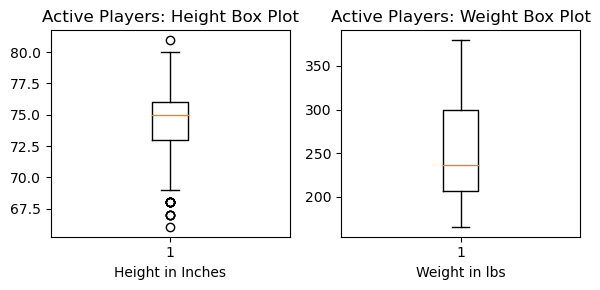

In [48]:
# Creating boxplots for height and weight- 

plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.boxplot(DS_A['Height'])
plt.title("Active Players: Height Box Plot")
plt.xlabel("Height in Inches")

plt.subplot(1, 2, 2)
plt.boxplot(DS_A['Weight'])
plt.title("Active Players: Weight Box Plot")
plt.xlabel("Weight in lbs")

plt.tight_layout()

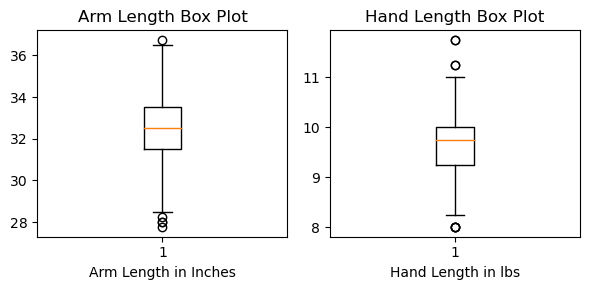

In [49]:
# Creating boxplots for arm and hand lengths- 

plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.boxplot(DS_A['Arms'])
plt.title("Arm Length Box Plot")
plt.xlabel("Arm Length in Inches")

plt.subplot(1, 2, 2)
plt.boxplot(DS_A['Hands'])
plt.title("Hand Length Box Plot")
plt.xlabel("Hand Length in lbs")

plt.tight_layout()

Text(0.5, 0, 'Age')

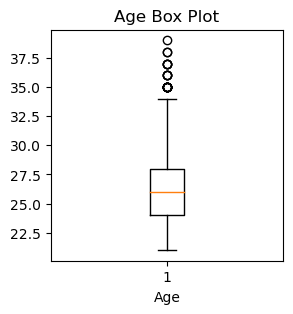

In [50]:
# Creating box plot for age- 
plt.figure(figsize=(3, 3))
plt.boxplot(DS_A['Age'])
plt.title("Age Box Plot")
plt.xlabel("Age")

****

**Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3)**<br> 

In [51]:
# Filtering data by positions to break out the data for our exploration-
DS_A_H1 = DS_A[(DS_A['Position'] == 'WR')]
DS_A_H2 = DS_A[(DS_A['Position'] == 'RB')]

DS_A_W1 = DS_A[(DS_A['Position'] == 'OL')]
DS_A_W2 = DS_A[(DS_A['Position'] == 'DL')]

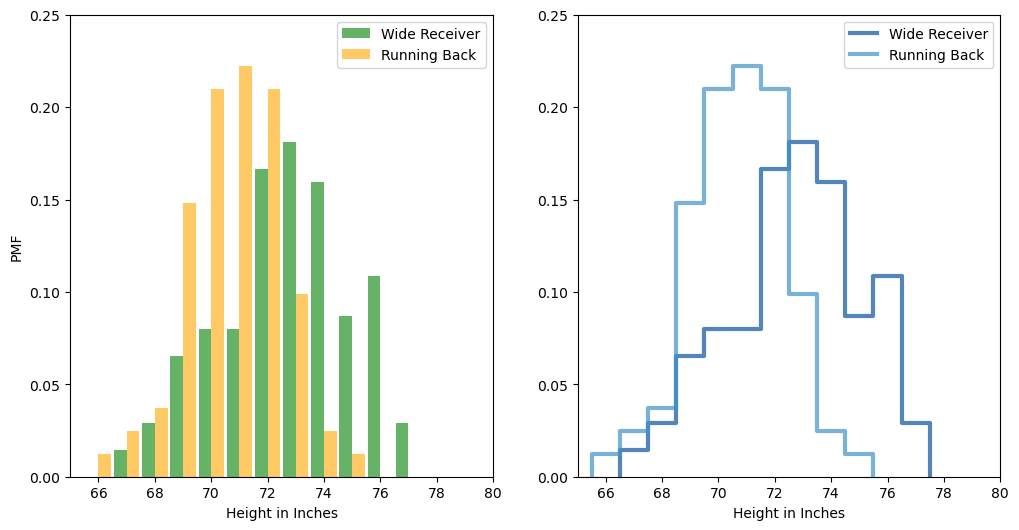

In [52]:
# PMF for the variable height between 2 positions with similar physical requirements-

pmf_h1 = thinkstats2.Pmf(DS_A_H1.Height, label="Wide Receiver")
pmf_h2 = thinkstats2.Pmf(DS_A_H2.Height, label="Running Back")

width = 0.45
axis = [65, 80, 0, 0.25]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf_h1, align="right", width=width, color='green')
thinkplot.Hist(pmf_h2, align="left", width=width, color='orange')
thinkplot.Config(xlabel="Height in Inches", ylabel="PMF", axis=axis)


thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf_h1, pmf_h2])
thinkplot.Config(xlabel="Height in Inches", axis=axis)

**Wide receivers are taller than running backs.**

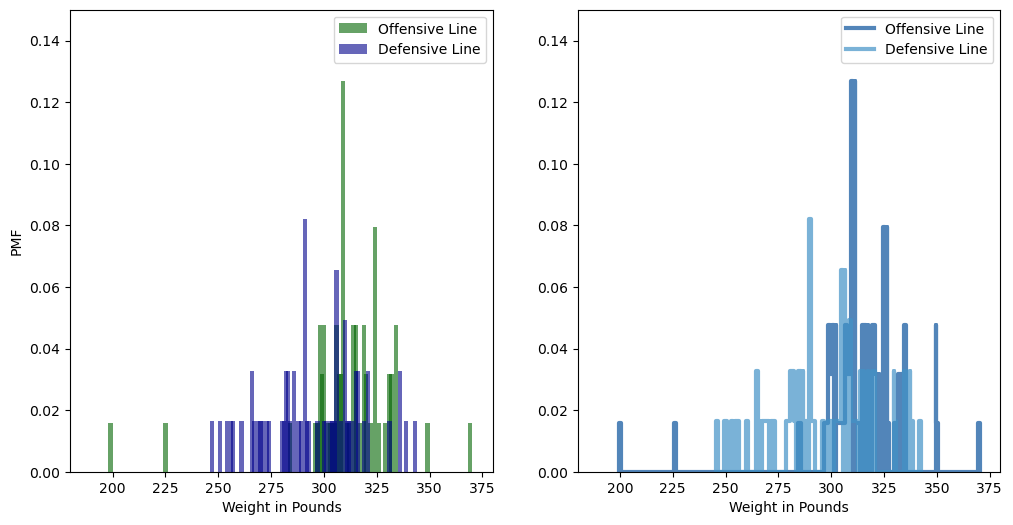

In [53]:
# PMF for the variable weight between 2 positions with similar physical requirements-

pmf_w1 = thinkstats2.Pmf(DS_A_W1.Weight, label="Offensive Line")
pmf_w2 = thinkstats2.Pmf(DS_A_W2.Weight, label="Defensive Line")

width = 2
axis = [180, 380, 0, 0.15]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf_w1, align="right", width=width, color='darkgreen')
thinkplot.Hist(pmf_w2, align="left", width=width, color='darkblue')
thinkplot.Config(xlabel="Weight in Pounds", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf_w1, pmf_w2])
thinkplot.Config(xlabel="Weight in Pounds", axis=axis)

**It seems that offensive linemen are heavier than the defensive linemen.**

****

**Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4)**<br> 

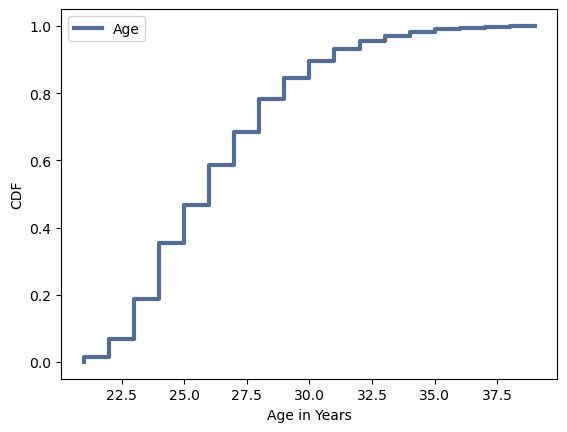

<Figure size 800x600 with 0 Axes>

In [54]:
cdf_a = thinkstats2.Cdf(DS_A.Age, label = 'Age')
thinkplot.Cdf(cdf_a)
thinkplot.Show(xlabel='Age in Years', ylabel='CDF')

The above CDF for the age of NFL players indicates that there is a slow progession of players till around 22 years of age, and then there is a gradual increase in the no. of player between ages 22 and 30. It is almost a straight line until around 30 years of age, and then it becomes flat.
<br>This tells me that there is a good spread of players from around 22 years to around 30 years of age in NFL and the no. of players older than 30 years of age reduces drasctically.
<br>This CDF helps me understand the spread of age of NFL players.<br>
<br>**Some observations from the CDF-**
1. 90% of the players are younger than 30 years of age.
2. Players older than 35 years of age make up only approx. 0.01% of the players.
3. It appears that less than 1% of players are younger than 23 years of age.
4. 70% of the players appears to be between 23 to 28 years of age.
****

**Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5)**<br> 

Mean, Var 247.38842975206612 2118.0408578649
Sigma 46.022177891369935


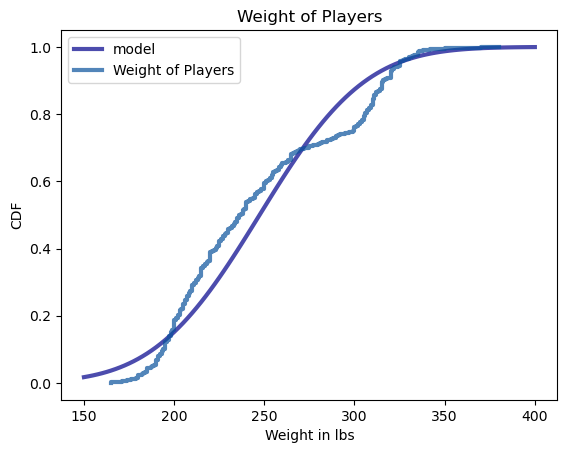

In [55]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(DS_A.Weight, p=0.01)
print("Mean, Var", mu, var)

# plot the model
sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=150, high=400)

thinkplot.Plot(xs, ps, label="model", color="darkblue")

# plot the data
cdf_w = thinkstats2.Cdf(DS_A.Weight, label="Weight of Players")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf_w)
thinkplot.Config(title="Weight of Players", xlabel="Weight in lbs", ylabel="CDF")

The normal probability plot shows that the weight is almost normal as it closely matches the model seen as the dark blue line. There are a few deviations but that is expected.

****

**Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7)**<br> 

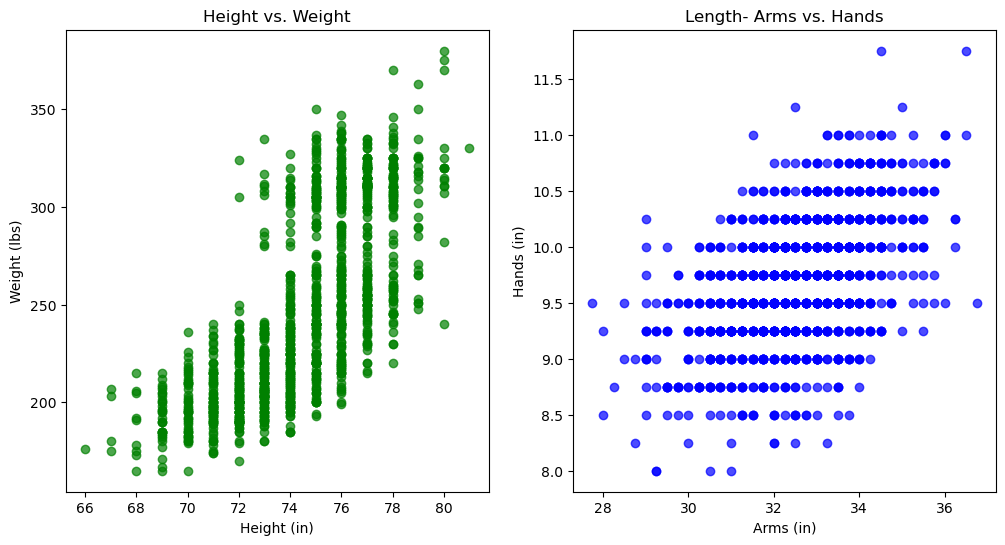

<Figure size 640x480 with 0 Axes>

In [56]:
# Creating scatterplot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(DS_A['Height'], DS_A['Weight'], marker='o', color='green', alpha=0.7)
plt.title("Height vs. Weight")
plt.xlabel("Height (in)")
plt.ylabel("Weight (lbs)")

plt.subplot(1, 2, 2)
plt.scatter(DS_A['Arms'], DS_A['Hands'], marker='o', color='blue', alpha=0.7)
plt.title("Length- Arms vs. Hands")
plt.xlabel("Arms (in)")
plt.ylabel("Hands (in)")

plt.show()
plt.tight_layout()

In [57]:
# Covariance between the height and weight of the players-

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

heights, weights = DS_A['Height'], DS_A['Weight']
Cov(heights, weights)

89.90535712878493

The covariance between the height and weight of the players is 89.9 which shows a strong covariance. It means that if the height increases the weight increases as well, and if the height decreases then the weights decreases too.

In [58]:
# Pearson’s correlation between the height and weight of the players-

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

Corr(heights, weights)

0.7212404384021831

Pearson's correlation is 0.72 which shows a strong linear correlation between the height and weight of the players.

****

**Conduct a test on your hypothesis using one of the methods covered in Chapter 9**<br> 

In [59]:
# Importing necessary functions-
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from scipy.stats import stats

In [60]:
# Creating weight variables for the filtered data-
DS_A_W1 = DS_A[(DS_A['Position'] == 'OL')]
DS_A_W2 = DS_A[(DS_A['Position'] == 'DL')]

In [61]:
# Conducting hypothesis test for weight-
t_parameter, p_parameter = ttest_ind(DS_A_W1['Weight'], DS_A_W2['Weight'])

alpha = 0.05

if p_parameter < alpha:
   print("\nReject the null hypothesis for the parameter.")
else:
   print("\nFail to reject the null hypothesis for parameter")
 
print ("\nT-statistics for the parameter hypothesis is-" , t_parameter, "\n\nP-value for the parameter hypothesis is-", p_parameter)


Reject the null hypothesis for the parameter.

T-statistics for the parameter hypothesis is- 4.492638198458014 

P-value for the parameter hypothesis is- 1.6099013615554572e-05


****

**For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11)**<br> 

In [62]:
# Regression analysis on one dependent and one explanatory variable-

import statsmodels.formula.api as smf

formula = 'Weight ~ Height'
model = smf.ols(formula, data=DS_A)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1336.
Date:                Sat, 18 Nov 2023   Prob (F-statistic):          1.09e-198
Time:                        20:30:01   Log-Likelihood:                -6060.5
No. Observations:                1234   AIC:                         1.213e+04
Df Residuals:                    1232   BIC:                         1.214e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -721.8226     26.545    -27.193      0.000    -773.901    -669.745
Height        13.0231      0.356     36.547      0.000      12.324      13.722
==============================================================================
Omnibus:                       43.073   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.851
Skew:                           0.388   Prob(JB):                     2.22e-09
Kurtosis:                       2.583   Cond. No.                     2.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Logistical Regression was performed to predict weight with height as predictor variable.
<br>As evident from the pvalues height is statistically very significant in predicting height.

In [63]:
# Regression analysis on one dependent and multiple explanatory variables-

import statsmodels.formula.api as smf

formula = 'Height ~ Weight + Arms + Hands + Age'
model = smf.ols(formula, data=DS_A)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     564.3
Date:                Sat, 18 Nov 2023   Prob (F-statistic):          2.26e-276
Time:                        20:30:01   Log-Likelihood:                -2299.7
No. Observations:                1234   AIC:                             4609.
Df Residuals:                    1229   BIC:                             4635.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.8733      1.254     32.596      0.000      38.413      43.333
Weight         0.0229      0.001     17.865      0.000       0.020       0.025
Arms           0.8218      0.041     19.901      0.000       0.741       0.903
Hands          0.1433      0.094      1.529      0.127      -0.041       0.327
Age           -0.0079      0.014     -0.552      0.581      -0.036       0.020
==============================================================================
Omnibus:                        2.976   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                3.038
Skew:                           0.116   Prob(JB):                        0.219
Kurtosis:                       2.926   Cond. No.                     7.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Logistical Regression was performed to predict height with weight, arm length, hand length and age as predictor variables.
<br>As evident from the pvalues weight and arm length are statistically significant in predicting height.

****

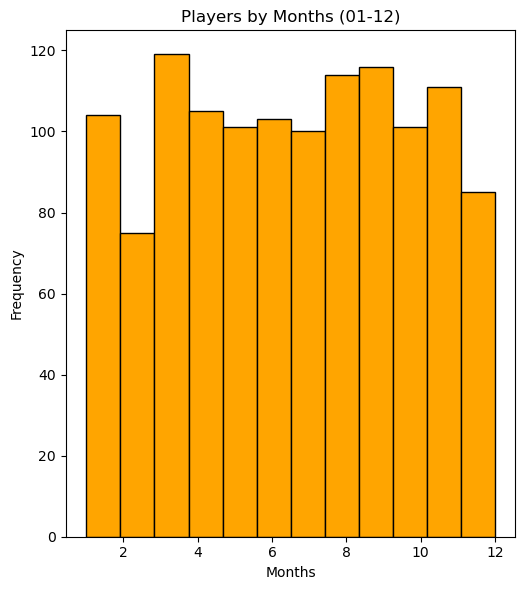

In [64]:
# Additional analysis on the month of birth of NFL players-

# Creating histograms
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(DS_A['Month of Birth'], bins=12, range=(1, 12), color='orange', edgecolor='black')
plt.title("Players by Months (01-12)")
plt.xlabel("Months")
plt.ylabel("Frequency")

plt.tight_layout()

plt.show()

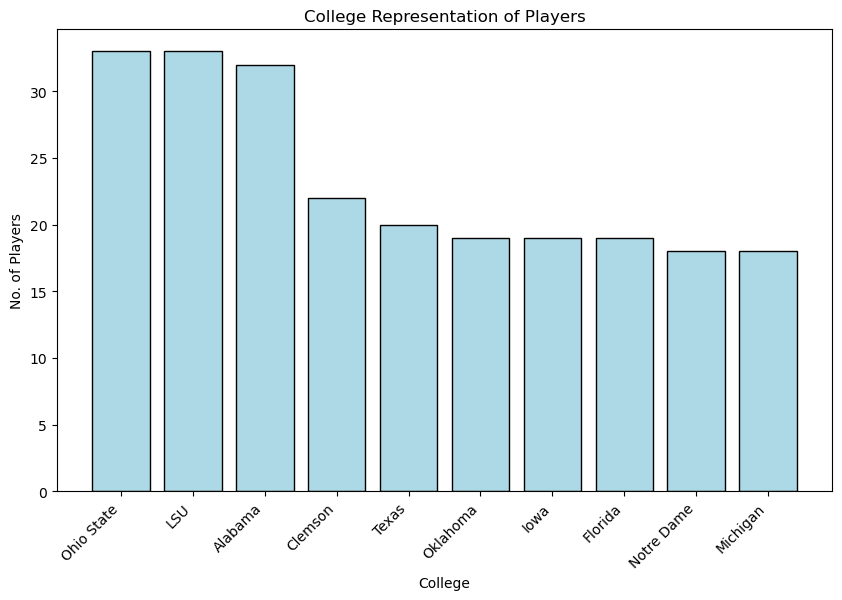

In [65]:
# Additional analysis on the colleges of NFL players-

# Calculate the number of players per college
DS_A_C = DS.groupby('College')['Full_Name'].count().reset_index()
DS_A_C1 = DS_A_C.sort_values(by='Full_Name', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(DS_A_C1['College'], DS_A_C1['Full_Name'], color='lightblue', edgecolor='black')
plt.xlabel('College')
plt.ylabel('No. of Players')
plt.title('College Representation of Players')
plt.xticks(rotation=45, ha='right')

plt.show()

****

**Outcome of your EDA:**<br> 

As an out come of my EDA on the NFL players, I can answer all the questions that i initially planned to answer. Some answers were found while following the structure of the project and for some I had to do some additional analysis.
I feel good about this project and the work I did on the data I gathered.
Here are the final answers to my questions:

1. What is the spread of age of NFL players?
   - The spread of age of NFL players is 9.9 years. 
   
2. How tall are most of the players are?
   - The most common height of the playesr is 76-77 inches wi==hich is 6'4" to 6'5" tall.
   
3. What is the average height of players?
   - Average height of NFL players is 74.44 in or 6'2.5".
   
4. How much does the majority of players weigh?
   - There are 2 buckets of weight where most of the players fall- 200-210 lbs and then 300-310 lbs.
    
5. What is the average weight of NFL players?
   - The average weight of NFL players is 247.7 lbs. 
    
6. How does the weight of offensive and defensive linemen compare to each other?
   - Offensive linemen are in general heavier than the defensive linemen. The reason could be that the defensive linemen need to be more      agile and aggressive to tackle the quarter back, where as offensive linemen don't need a lot of agility in most scenarios. 
    
7. Which players are taller between wide receivers and line backers?
   - Wide receivers are generally taller than the running backs. And again the role and requirements of the wide receivers are such to warrant this extra height. 
    
8. Are there more chances of getting into NFL if you’re born in certain months of the year?
   - As per the data we have March and September seems to be the months when comparatively more players were born. The reson needs to be researched more and is not evident with the data we have. 
    
9. Which college produces most NFL players?
   - As per the data the top 3 colleges represented in NFL are LSU, 
Ohio Stat, 
Alaba State and there are 33, 33 and 32 players3respectively from each of them. The bar graph above represents the top 10 colleges.2    

**What do you feel was missed during the analysis?**<br> 

I think the location of the players was missing. With that information I could have found out the gegraphical spread of the players as well, to see if there are certain states which have a bigger representation in NFL.
I could have also extracted the player statistics to see if there is any relationship between some physical attributes of the players with their performance on the field.

**Were there any variables you felt could have helped in the analysis?**<br> 

From what I set out to explore, I think I had enough data and variables to complete my analysis.

**Were there any assumptions made you felt were incorrect?**<br> 

No, I did not make any assumptions in this analysis, which could have played any role in my data exploration.

**What challenges did you face, what did you not fully understand?**<br> 

The initial challenge was to select a dataset which fulfils all requirements of the project. When I started I was thinking of doing some analysis on a couple of non-numeric variables, however, I did not realize that I'd fall two short of five numeric variables that are required for the project. I was able to extract additional numeric variable for my data set and I managed to fulfil the project requirements, as well as my analysis on non-numeric variables.
Apart from the data, I'm finding the regression and prediction models a bit difficult to understand. I can use the functions and build the models, but I want to understand the underlying concepts as well. Hopefully these concepts will be more clear as I progress with this program in the upcoming courses.